In [1]:
import scanpy as sc
import os
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [2]:
sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.n_jobs=4
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['pdf.fonttype'] = 42
#%matplotlib inline
sc.settings.figdir = "fig1"
sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(8,8))


In [3]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Re-load new version

In [4]:
# import scanpy as sc
# adata_core=sc.read_h5ad('/nfs/team298/ls34/disease_atlas/final_fb_adatas/adata_fbspericytesnonlesional_SCVI_3526_new_neighbor50_ANNOTATED_umap30_leiden_paga3_FINALcoreonly.h5ad.v4')

In [5]:
# PATH = '/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas/adata_healthy_core.h5ad'
# adata_core.write(PATH)

In [6]:
PATH = '/nfs/team298/ls34/fibroblast_atlas_paper/final_adatas_chloecolours/adata_healthy_core.h5ad'
adata_core=sc.read_h5ad(PATH)

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


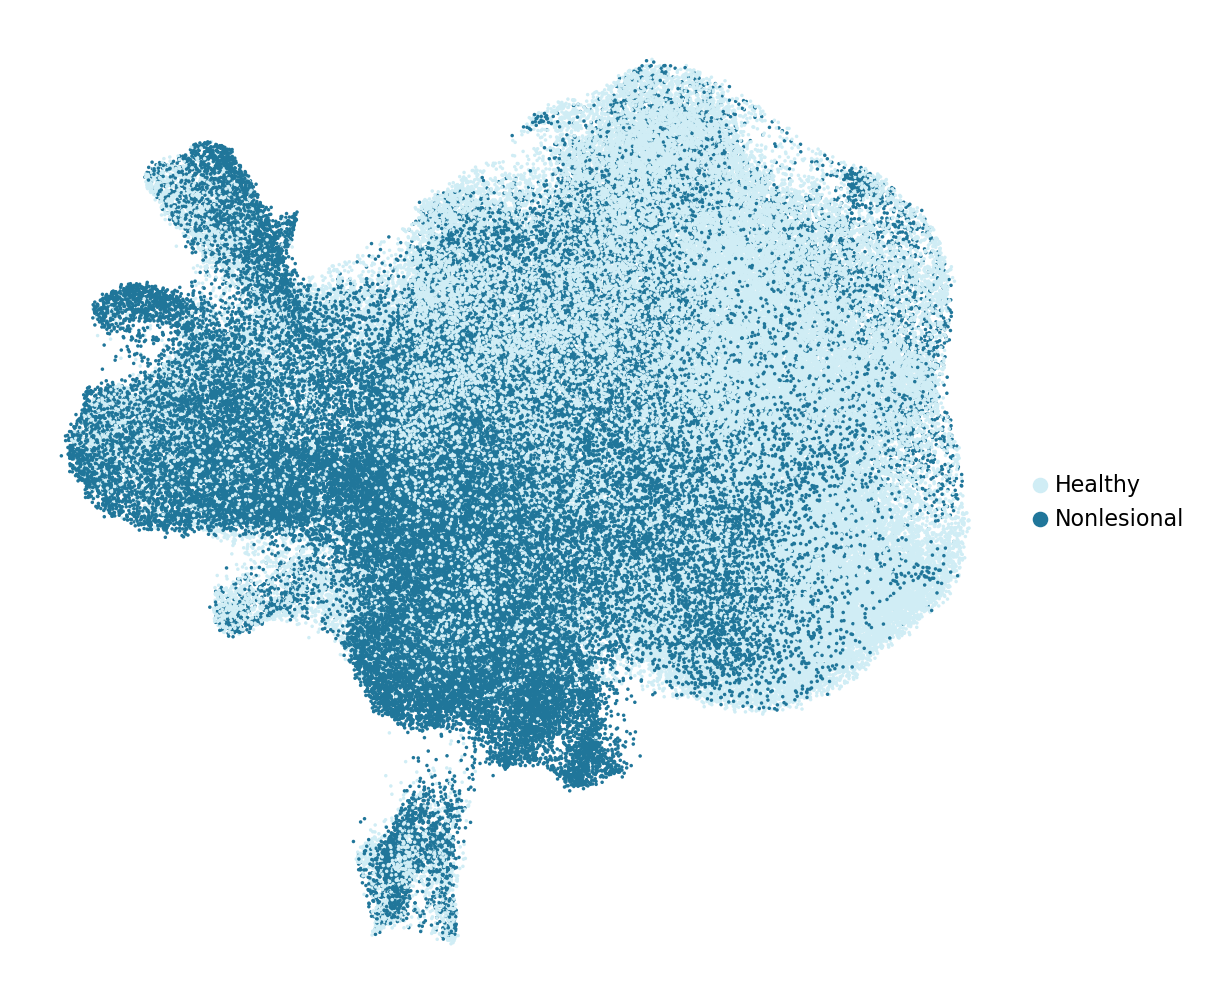

In [7]:
#%matplotlib inline

sc.pl.umap(adata_core, 
           color=["Site_status2"],
           s=10,
           legend_fontsize=10, title='',
          save="fig1_healthy_nonlesional.pdf"
          )
# plt.savefig("fig1_healthy_nonlesional.pdf", format="pdf", dpi=300, bbox_inches="tight")

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


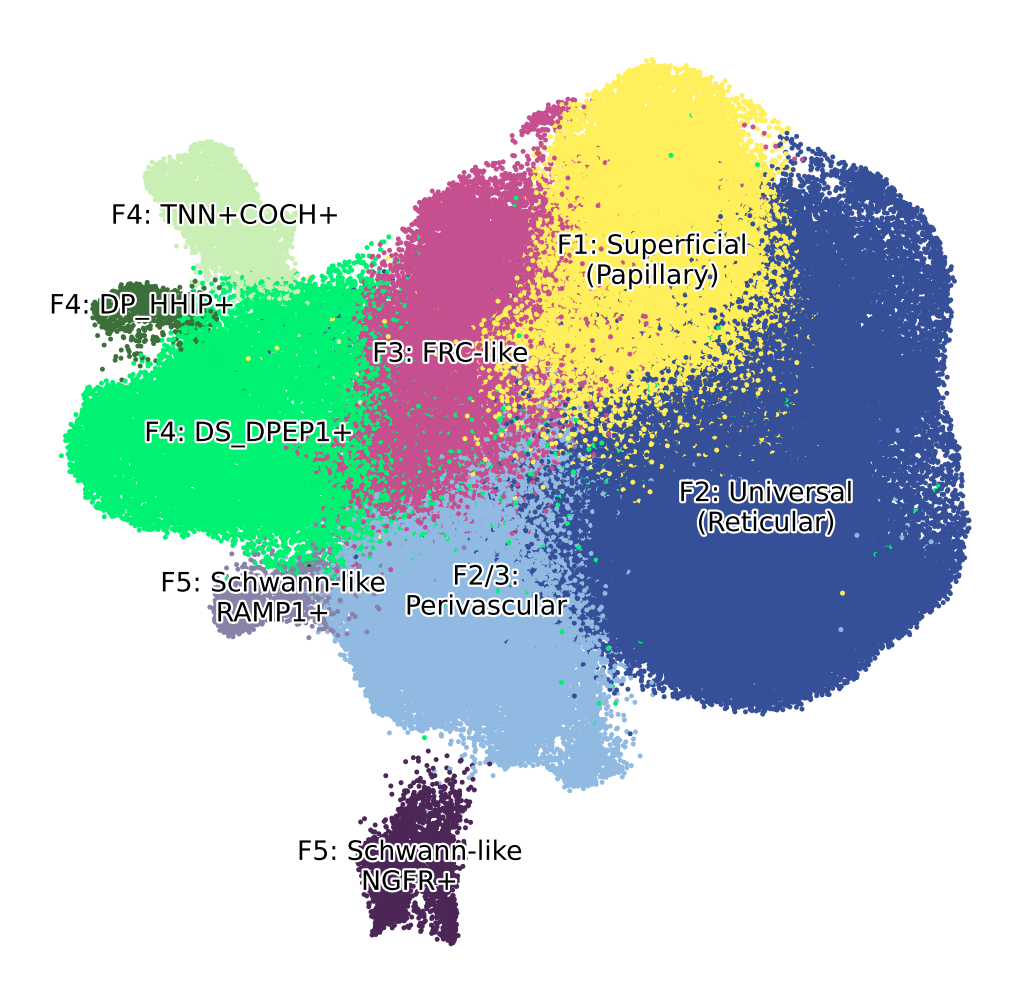

In [8]:

sc.pl.umap(
        adata_core,
        color=["corefb_names"],
        ncols=1, s=20,
    legend_loc="on data", legend_fontoutline=2, 
           legend_fontweight="normal", legend_fontsize=12, title='',
        frameon=False,
     save="_fig1umap_300dpi.pdf"
    
    )


In [9]:
# sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(14,14))

# adata_core.obs["corefb_names"] = adata_core.obs["corefb_names"].astype("category")

# # 1) Define palettes as lists/arrays of valid colors
# #    For F1, we only want one yellow swatch, so make it a single‐element list:
# colors_f1 = ["#F3E600"]            # now this is a list of one hex code

# colors_f2 = plt.cm.Blues(np.linspace(0.2, 1, 10))
# colors_f3 = plt.cm.Reds(np.linspace(0.1, 1, 10))
# colors_f4 = plt.cm.Greens(np.linspace(0.2, 1, 10))
# colors_f5 = plt.cm.Purples(np.linspace(0.5, 1.0, 10))
# colors_other = plt.cm.Greys(np.linspace(0.2, 1, 10))

# custom_colors = {}
# f4_count = 0

# # 2) Pop the shared F1 color out up front
# #    (If you had multiple F1s that needed distinct yellows, you’d include more hexes here.)
# f1_shared_color = colors_f1.pop(0)  # f1_shared_color == "#F3E600"
# # colors_f1 is now [] (empty). Any leftover F1s will just reuse f1_shared_color.

# for category in adata_core.obs["corefb_names"].cat.categories:
#     if category.startswith("F1"):
#         # If you ever want separate yellows after the shared one, you’d do:
#         #    if colors_f1: 
#         #        custom_colors[category] = colors_f1.pop(0)
#         #    else:
#         #        custom_colors[category] = f1_shared_color
#         #
#         # But here, every F1 just uses the same hex:
#         custom_colors[category] = f1_shared_color

#     elif category.startswith("F2"):
#         custom_colors[category] = colors_f2[0]      # first blue shade
#         colors_f2 = colors_f2[3:]                  # skip ahead 3 in the Blues palette

#     elif category.startswith("F3") or category.startswith("Peric") or category.startswith("Vasc"):
#         custom_colors[category] = colors_f3[0]
#         colors_f3 = colors_f3[1:]

#     elif category.startswith("F4"):
#         custom_colors[category] = colors_f4[0]
#         if f4_count == 0:
#             colors_f4 = colors_f4[3:]
#         elif f4_count == 1:
#             colors_f4 = colors_f4[3:]
#         else:
#             print(">3 F4s: ran out of distinct Greens!")
#         f4_count += 1

#     elif category.startswith("F5"):
#         custom_colors[category] = colors_f5[0]
#         colors_f5 = colors_f5[4:]

#     else:
#         custom_colors[category] = colors_other[0]
#         colors_other = colors_other[3:]

# # 3) Map back into Scanpy’s .uns so UMAP will pick them up
# adata_core.uns["corefb_names_colors"] = [
#     custom_colors[cat] for cat in adata_core.obs["corefb_names"].cat.categories
# ]

# # 4) Plot
# sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(12,12))
# sc.pl.umap(
#     adata_core,
#     color=["corefb_names"],
#     ncols=1,
#     s=20,
#     legend_loc="on data",
#     legend_fontoutline=2,
#     legend_fontweight="normal",
#     legend_fontsize=18,
#     title="",
#     frameon=False,
# )

In [10]:
# sc.pl.umap(
#         adata_core,
#         color=["corefb_names"],
#         ncols=1, s=60,
#     legend_loc="on data", legend_fontoutline=2, 
#            legend_fontweight="normal", legend_fontsize=40, title='',
#         frameon=False,
#      save="_fig1umap_300dpi.pdf"
    
#     )


/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


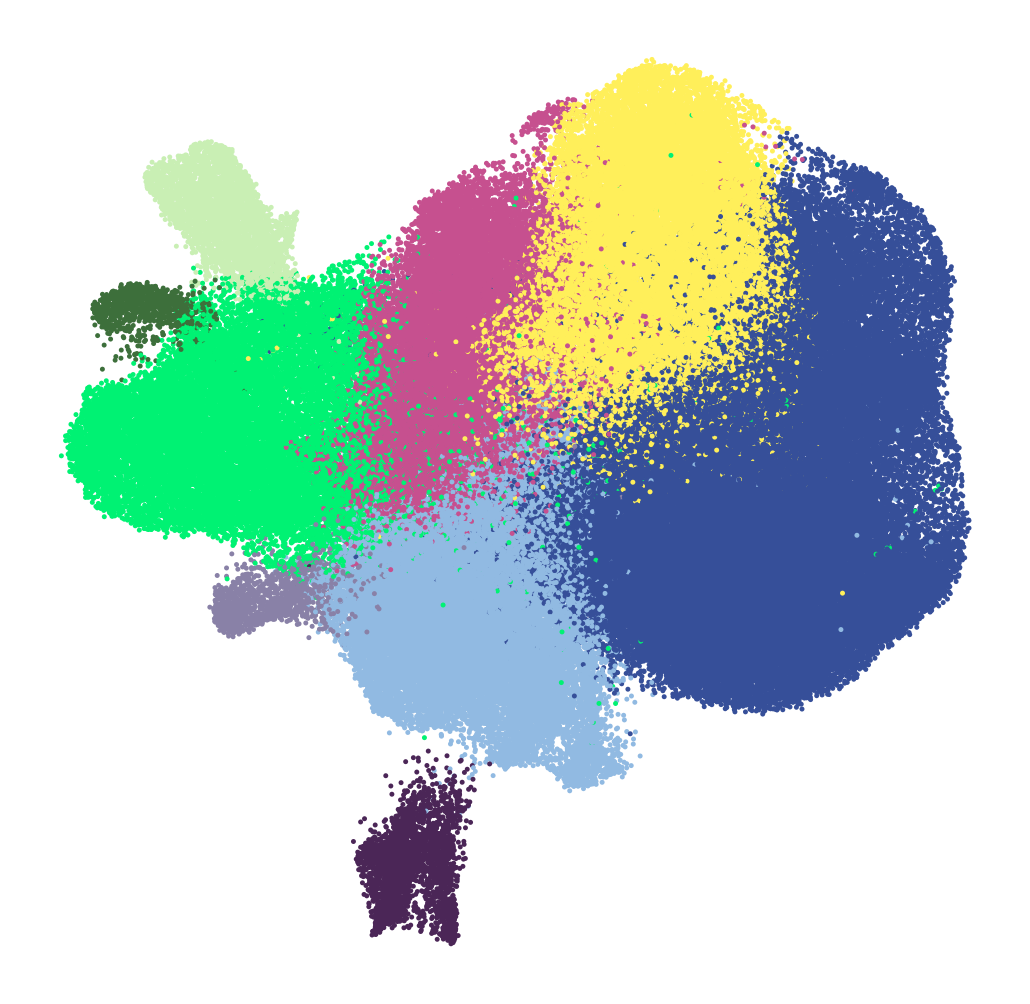

In [11]:
sc.pl.umap(
        adata_core,
        color=["corefb_names"],
        ncols=1, s=20,
    legend_loc=None, legend_fontoutline=2, 
           legend_fontweight="normal", legend_fontsize=12, title='',
        frameon=False,
     save="_fig1umap300dpi_nolabels.pdf"
    
    )

 

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


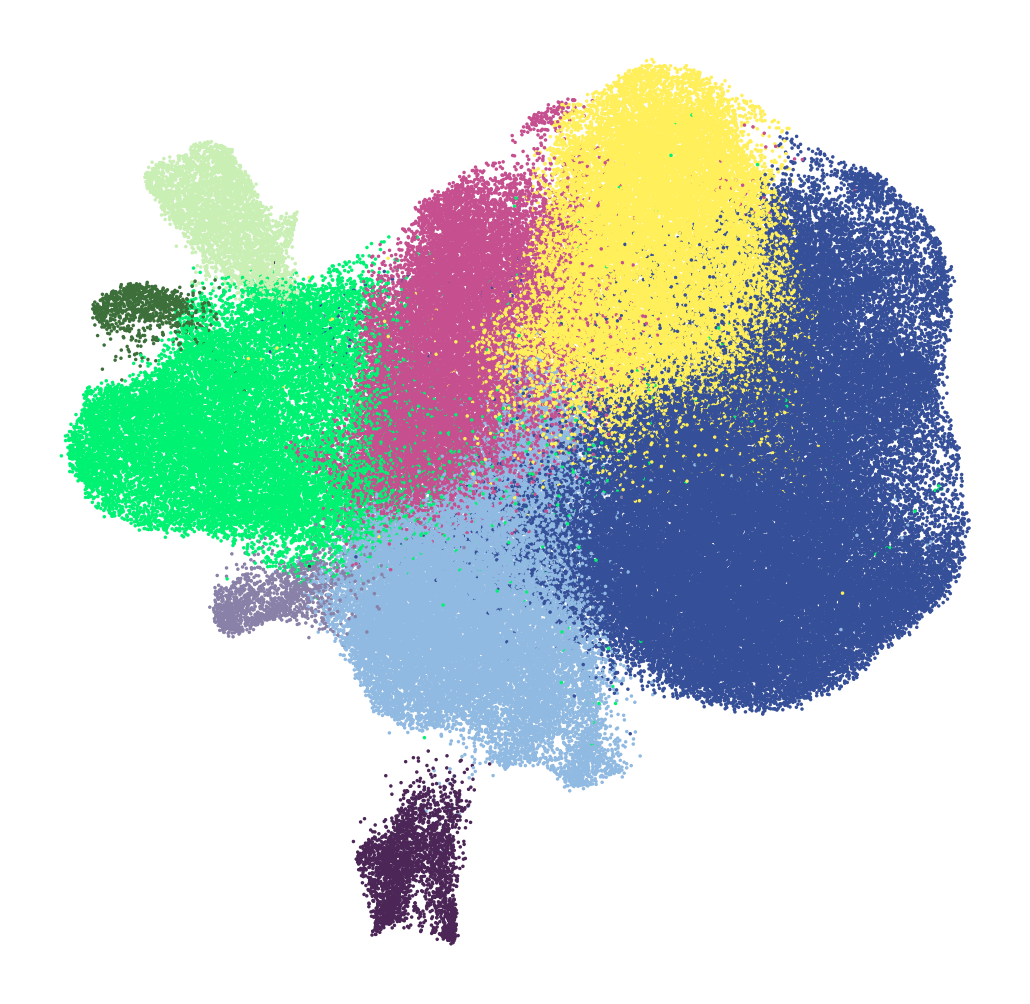

In [12]:
sc.pl.umap(
        adata_core,
        color=["corefb_names"],
        ncols=1, s=10,
    legend_loc=None, legend_fontoutline=2, 
           legend_fontweight="normal", legend_fontsize=12, title='',
        frameon=False,
     save="_fig1umap300dpi_nolabels_smallercells.pdf"
    
    )

 

/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/jovyan/my-conda-envs/sko_ls/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(

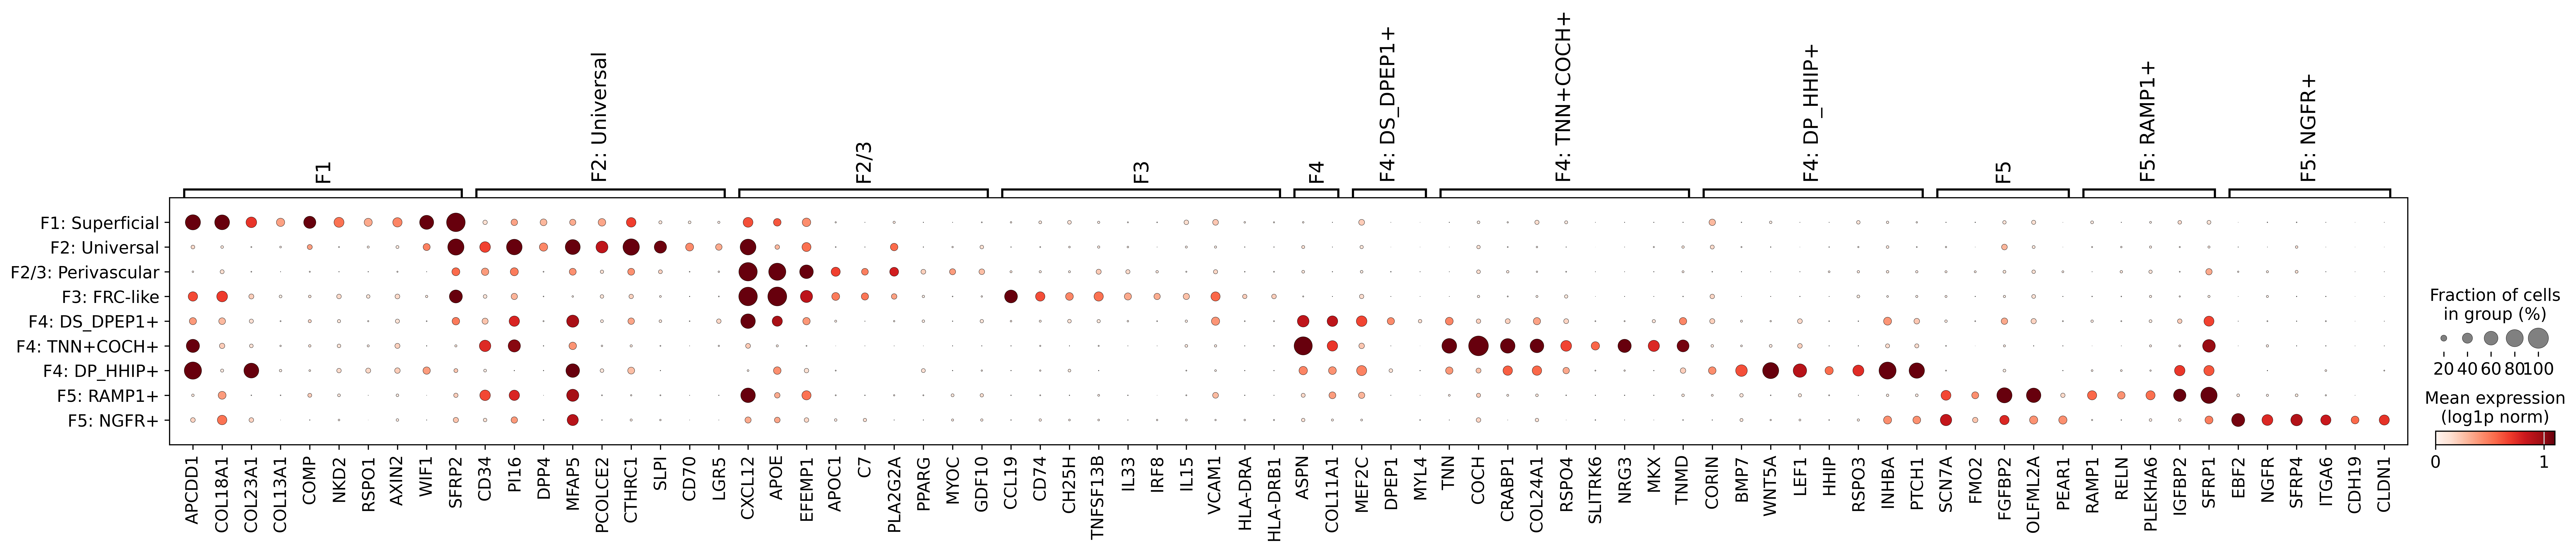

In [13]:
adata_core_healthy=adata_core[adata_core.obs["Patient_status"]=="Healthy"].copy()
reynolds_short_final = {       
    "F1":[   "APCDD1",   "COL18A1",  "COL23A1",   "COL13A1",  "COMP",  
                                          "NKD2","RSPO1",  "AXIN2" , "WIF1",'SFRP2',
                                          #"HSPB3", 
                                   ],
    
                                    
                   
    "F2: Universal": ['CD34',
  'PI16',    'DPP4', 'MFAP5', 'PCOLCE2' , 'CTHRC1',   'SLPI',#  "TSPAN8",#'MATN4',
              #"CD24",  
           "CD70", "LGR5",#"KLF4"
              ],
      'F2/3': ['CXCL12', 'APOE', 'EFEMP1', #'GGT5', 
                                    "APOC1", "C7", "PLA2G2A", 'PPARG', #"CD36",
                                          #'IL1RL1', 'MARCH3', 'PCSK1', 
                                          
                                          
                                          # "FMO1", 
                                          
                                   # "PPARG", "TNFSF14"
                           "MYOC", "GDF10", # "LINC-PINT", 
                             # "POU3F3", 
                                  # "TNNT3", 
                    ],
 'F3': ['CCL19',"CD74" ,  'CH25H',  "TNFSF13B",  'IL33', "IRF8" ,#"COX4I2", 
       # "IL7",
        "IL15",
        "VCAM1", "HLA-DRA", "HLA-DRB1",# "CCL11","CCL7", "CCL2",
        
        #"ICAM1", 
        #'CX3CL1', 'ACHE', 'CCL8', 
 
           ], 
      

                           #     "EXTRA_F1": [   'COL23A1', 'CLEC2A', 'AXIN2', 'TNFRSF19', 'NTM', 'PLCB4', 'MYO10', 'RSPO1', 'COL6A5', 'AHRR', 'ESRRG', 'FREM1', 'UNC13C',
                            #       ],
               #   "F*": ['PLIN2', 'CEMIP' , 'ISG20', 'MMP1'], 
#"Palmoplantar": ["CRTAC1",# "HOXA13", "CILP2", #"F5",
#                 "SCX", "SOX5",  ], #"CDH13", "HPSE2", "CROCC", "CRTAC1", "CRLF1", "SCX", "LRFN5",

                   
                    "F4": ["ASPN", 'COL11A1',],          
 'F4: DS_DPEP1+': ['MEF2C', 
  'DPEP1',
  "MYL4", 
  #'PPP1R14A',
 # 'POSTN',
],
 'F4: TNN+COCH+': [
     #'PTGDS',
  #'OGN',
  'TNN',
  'COCH',
  'CRABP1',
  'COL24A1',"RSPO4","SLITRK6",# "CCK", 
     'NRG3', 'MKX', 'TNMD', # 'SCX'
          ],
    "F4: DP_HHIP+": ["CORIN", 
        #"INHBA", 
         "BMP7", "WNT5A", 'LEF1',
        #"SOX18", #"BAMBI", 
        "HHIP", #"RSPO2", 
        "RSPO3", "INHBA",#"ALPL",
      #  "DIO2", 
        "PTCH1", #"COL23A1", #'SOX2', 
       # 'PI15', "S100B",
           ],
        "F5": [  "SCN7A" ,"FMO2",   "FGFBP2","OLFML2A","PEAR1", # "PDGFRB", #"TAC1" 
              ],
         
                      "F5: RAMP1+": ["RAMP1", "RELN", 'PLEKHA6',  "IGFBP2", 'SFRP1', #"COL26A1", #"TAC1"
                                   ], #"CPE", "PTN", "IGF1", 

 'F5: NGFR+': [  'EBF2', "NGFR",  'SFRP4',# "TENM2", #"TM4SF1", "ANGPTL7",  
               "ITGA6", "CDH19",  "CLDN1" ,#"FOXS1", #"SOX17",
                 #"CAVIN2", "SFRP5", #"TNNC1"
                
                     ],
 
}
sc.settings.set_figure_params(dpi=300, facecolor="white", frameon=False, figsize=(13,13))



sc.pl.dotplot(
    adata_core_healthy,
    reynolds_short_final,
    groupby="corefb_names2",
    vmax=1.1,
    dendrogram=False,
      colorbar_title="Mean expression\n(log1p norm)",
    save="fig1c_dotplot.pdf"
) 
 
  

In [14]:
import pickle
file_path = '/nfs/team298/ls34/fb_dict.pkl'

# Open the file in write-binary mode and pickle the dictionary
with open(file_path, 'wb') as file:
    pickle.dump(reynolds_short_final, file)

print(f"Dictionary successfully SAVED to {file_path}")
     

Dictionary successfully SAVED to /nfs/team298/ls34/fb_dict.pkl


# All Fbs (outline in 1a)

In [15]:
# import scanpy as sc
# import matplotlib.pyplot as plt
# import os

# sc.settings.verbosity=0 # verbosity: errors (0), warnings (1), info (2), hints (3)
# #sc.settings.n_jobs=4
# plt.rcParams['ps.fonttype'] = 42
# plt.rcParams['pdf.fonttype'] = 42
# #%matplotlib inline
# sc.settings.figdir = "fig1"


In [16]:
# %matplotlib inline
# sc.settings.set_figure_params(dpi_save=300, facecolor="white", frameon=False, figsize=(20,20))


In [17]:
# base_dir='/nfs/team298/ls34/disease_atlas/mrvi/'
# adata_filename="/nfs/team298/ls34/disease_atlas/mrvi/adata_mrvi_all_scvi4_clustered_ANNOTATED.h5ad"
# adata=sc.read_h5ad(adata_filename)


In [18]:
# import numpy as np
# adata.obs["fb_vs_other2"] = np.where(
#     (adata.obs["leiden_res0.2"] == "0") & (adata.obs["Site_status_binary"] == "Lesional"), "Fibroblast_lesional",
#     np.where(
#         (adata.obs["leiden_res0.2"] == "0") & (adata.obs["Site_status_binary"] == "Nonlesional"), "Fibroblast_nonlesional",
#         "Other"
#     )
# )

# custom_colors = {
#     "Fibroblast_nonlesional": "#b0e0f0",  # Light blue
#     "Fibroblast_lesional":  "#FFB6C1",   #FFB6C1",  # Light red
#     "Other": "#D3D3D3"  # Light grey
# }

# adata.obs["fb_vs_other2"] = adata.obs["fb_vs_other2"].astype("category")
# adata.uns['fb_vs_other2_colors'] = [custom_colors[category] for category in adata.obs['fb_vs_other2'].cat.categories]


In [19]:
# sc.pl.umap(adata,  
#            color="fb_vs_other2",
#            s=1,
#            legend_fontsize=20,
#           title="",
#           save="fig1a_alldata.pdf")


# sfig1

In [20]:
# sc.settings.figdir = "sfig1"


In [21]:
# sc.pl.dotplot(    adata,
#      ["COL1A1", "COL1A2","COL3A1", "DCN", "LUM" ,"PDGFRA", "FBLN1"],
#     groupby="all",# vmax=10, vmin=3,
#    standard_scale="var",
#     dendrogram=False,
#               save = "sfig1a_dotplot.pdf"
#              )



In [22]:
sc.logging.print_versions()




-----
anndata     0.10.6
scanpy      1.9.8
-----
PIL                         9.5.0
anyio                       NA
arrow                       1.3.0
asciitree                   NA
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.14.0
backcall                    0.2.0
bottleneck                  1.3.7
certifi                     2023.07.22
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.1.0
cloudpickle                 3.0.0
colorama                    0.4.6
cycler                      0.10.0
cython_runtime              NA
dask                        2024.2.0
dateutil                    2.8.2
debugpy                     1.6.7
decorator                   5.1.1
defusedxml                  0.7.1
dill                        0.3.8
entrypoints                 0.4
exceptiongroup              1.1.1
executing                   1.2.0
fastjsonschema              NA
fon